In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
# sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")
sys.path.append("/Users/alexandrerame/code_repository/notebook/data")

from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (5, 5)
plot.plt.rcParams['text.usetex'] = True
plot.plt.rcParams['font.family'] = 'serif'
plot.plt.rcParams['font.serif'] = 'Times Roman'
# plot.FORMAT_X=1
# plot.FORMAT_Y=3

In [ ]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="length",
    key2="acc",
    keyclustering="length",
    keyerror="acc_std",
    lambda_filtering=lambda x: x.get("testenv", 0) == 0,
    loc="lower right",
    order="2log",
    list_indexes=[0, 1]
)
# plot.save_fig(fig, "diwa/diffruns_m_1to40_oodiid.pdf")

# Old

In [ ]:

from codeplot.plot import *
import matplotlib.pyplot as plt

from data.home import home0_m1to60,home0_m40to60, home0_m1to60_testtrain
lsoup = merge(home0_m1to60_testtrain.lsoup)

l_m = []
for i in range(41):
    if not lsoup[i]:
        continue
    l_m.append({})
    l_m[-1]["length"] = i
    l_m[-1]["soup"] = mean([l["soup"] for l in lsoup[i]]) + 0.002
    l_m[-1]["trainsoup"] = mean([l["trainsoup"] for l in lsoup[i]])
    l_m[-1]["trainstd"] = np.std([l["trainsoup"] for l in lsoup[i]])
    l_m[-1]["std"] = np.std([l["soup"] for l in lsoup[i]])

dict_key_to_label = {"soup": "OOD Acc.", "length": "Number of training runs", "trainsoup": "IID Acc."}
dict_key_to_limit = {}
def plot_iter(key1, order=1, add_legend=True):
    
    fig, ax1 = plt.subplots()
    plt.xlabel(dict_key_to_label.get(key1, key1), fontsize="x-large")
    colors = cm.rainbow(np.linspace(0.3, 1, 4))
    ax1.set_ylabel(dict_key_to_label.get("soup", "soup"), fontsize="x-large", color=colors[0])

    def plot_with_int(l, ax, color, label, key2, marker, linestyle):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l if key2 in ll]
        ax.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label if order != 1 else None,
            marker=marker
        )
        #fit_and_plot(key1, key2, l, order, label, color, linestyle=linestyle)


    plot_with_int(
        l_m,
        ax1,
        color=colors[0],
        label="OOD Acc.",
        key2="soup",
        marker=".",
        linestyle="-"
    )
    ax1.errorbar(get_x(l_m, key1), get_x(l_m, "soup"), [l["std"] for l in l_m], linestyle='None', marker='', color=colors[0])
    if "soup" in dict_key_to_limit:
        ax1.ylim(dict_key_to_limit["soup"])
    ax2 = ax1.twinx()
    ax2.set_ylabel(dict_key_to_label.get("trainsoup", "trainsoup"), fontsize="x-large", color=colors[2])

    plot_with_int(
        l_m,
        ax2,
        color=colors[2],
        label="IID Acc.",
        key2="trainsoup",
        marker=".",
        linestyle="-"
    )
    ax2.errorbar(get_x(l_m, key1), get_x(l_m, "trainsoup"), [l["trainstd"] for l in l_m], linestyle='None', marker='', color=colors[2])
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if add_legend:
        ax1.legend(fontsize="x-large", loc="lower left")
        ax2.legend(fontsize="x-large", loc="lower right")
    return fig

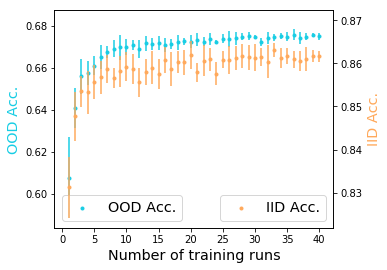

In [73]:
plt.rcParams["figure.figsize"] = (5,4)
fig = plot_iter("length", order="", add_legend=True)
plt.rcParams["figure.figsize"] = (7,7)
fig = plot_iter_soupacc("length", order="2log",do_ens=True, do_soup=True, ood=True)